In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
import matplotlib.pyplot as plt

In [6]:
import nltk

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
import xgboost as xgb 

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df=pd.read_csv("spam.csv")


In [18]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
df.shape

(5572, 2)

In [22]:
df=df.drop_duplicates()

In [23]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='Category', ylabel='count'>

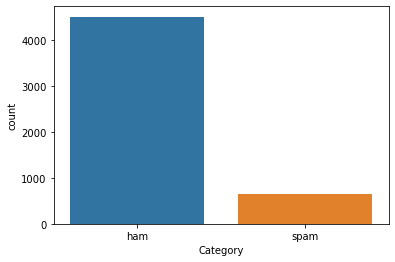

In [24]:
sns.countplot(x=df['Category'])

In [25]:
df['num_characters']=df['Message'].apply(len)

In [26]:
df

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [27]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35
5568,ham,Will ü b going to esplanade fr home?,36,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [29]:
df['num_sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df

,Category,Message,num_characters,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df

,Category,Message,num_characters,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,Will ü b going to esplanade fr home?,36,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
le=LabelEncoder()


In [34]:
df['Category']=le.fit_transform(df['Category'])


In [35]:
df

,Category,Message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [36]:
df[df['Category']==0].describe()


,Category,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869353,17.264836,1.806244
std,0.0,56.708301,13.587852,1.281910
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [37]:
df[df['Category']==1].describe()


,Category,num_characters,num_words,num_sentence
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.967239
std,0.0,30.399707,7.103501,1.480241
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

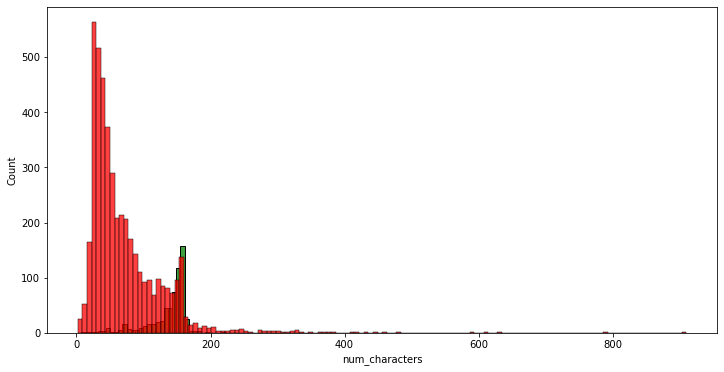

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['num_characters'],color='green')
sns.histplot(df[df['Category']==0]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

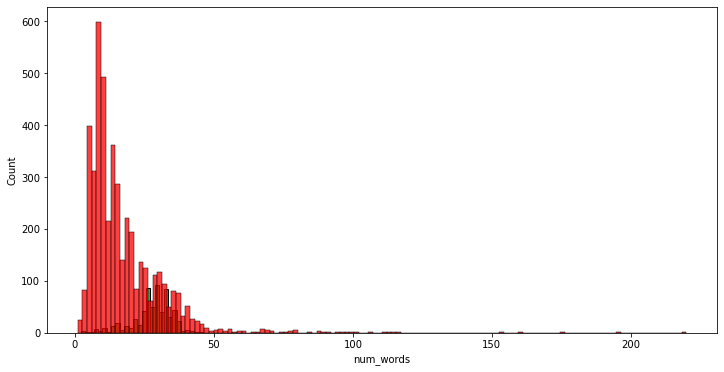

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['num_words'],color='green')
sns.histplot(df[df['Category']==0]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

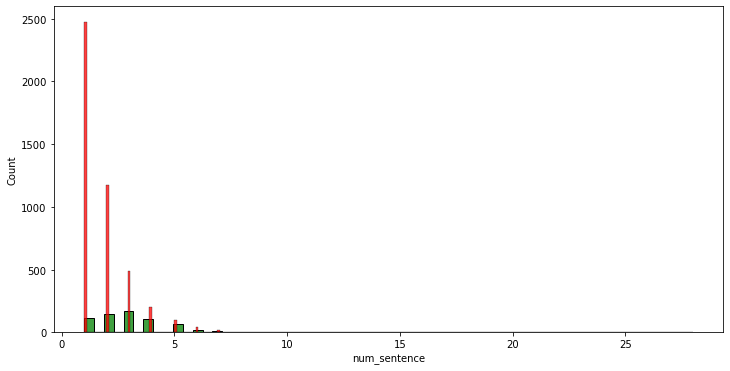

In [40]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['num_sentence'],color='green')
sns.histplot(df[df['Category']==0]['num_sentence'],color='red')

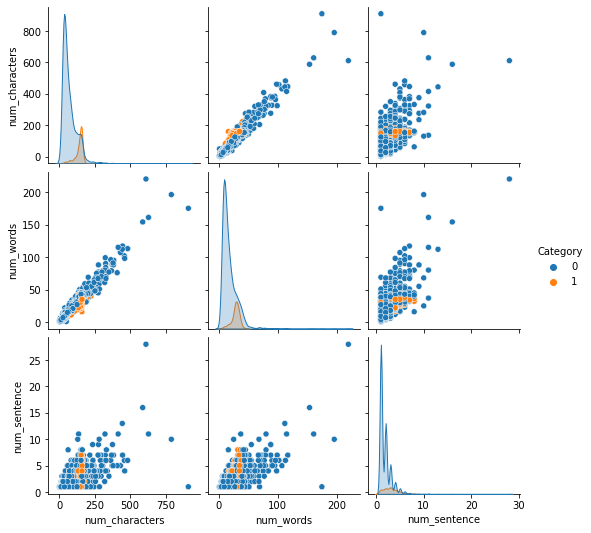

In [41]:
sns.pairplot(data=df,hue='Category')

<AxesSubplot:>

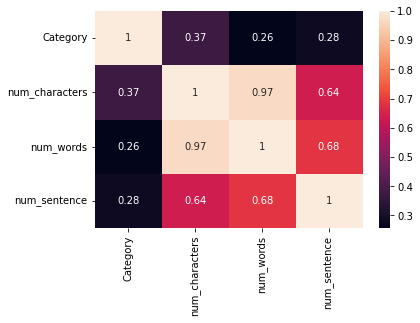

In [42]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. stemming

In [43]:
import nltk

In [44]:
from nltk.stem import PorterStemmer

In [45]:
from nltk.corpus import stopwords

In [46]:
import string

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
ps=PorterStemmer()

In [49]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return "".join(y)

In [50]:
df['transformed_text']=df['Message'].apply(transform_text)

In [51]:
ps.stem("loving")

'love'

In [52]:
df

,Category,Message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gojurongpointcraziavailbugingreatworldlaebuffe...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokewifuoni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentri2wklicompwinfacupfinaltkt21stmaytextf...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsayearlihorucalreadisay
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahthinkgoeusflivearoundthough
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2ndtimetri2contactupoundprize2claimeasicall087...
5568,0,Will ü b going to esplanade fr home?,36,9,1,übgoesplanadfrhome
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pitimoodsuggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guybitchactlikeinterestbuysomethelsnextweekgav...


In [53]:
spam_corpus=[]

In [54]:
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

641

In [56]:
spam_corpus

['freeentri2wklicompwinfacupfinaltkt21stmaytextfa87121receiventriquestionstdtxtratecappli08452810075over18',
 'freemsgheydarl3weekwordbacklikefunstilltbokxxxstdchgsendrcv',
 'winnervalunetworkcustomselectreceiveaprizerewardclaimcallclaimcodekl341valid12hour',
 'mobil11monthurentitlupdatlatestcolourmobilcamerafreecallmobilupdatcofree08002986030',
 'sixchancwincash100poundtxtcsh11sendcost6daytsandcapplireplihl4info',
 'urgent1weekfreemembershipprizejackpottxtwordclaim81010clccltdpobox4403ldnw1a7rw18',
 'xxxmobilemovieclubusecreditclickwaplinknexttxtmessagclickhttp',
 'englandvmacedoniadontmissnewstxturnationteam87077egengland87077triwalescotlandpoboxox36504w45wq',
 'thanksubscriptringtonukmobilchargpleasconfirmrepliyereplicharg',
 '07732584351rodgerburnmsgtricallreplismfreenokiamobilfreecamcordpleascall08000930705deliveritomorrow',
 'smacsptvnewjerseydevildetroitredwingplayicehockeycorrectincorrectendrepliendsptv',
 'congrat1yearspecialcinemapass2call09061209465csuprmanvmatrix3starwars3e

In [57]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


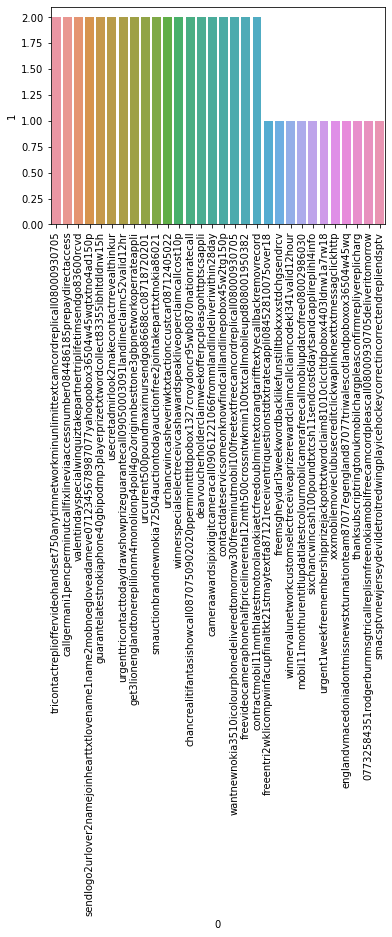

In [58]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
           pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [59]:
ham_corpus=[]

In [60]:
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

4508

In [62]:
ham_corpus

['gojurongpointcraziavailbugingreatworldlaebuffetcinegotamorwat',
 'oklarjokewifuoni',
 'udunsayearlihorucalreadisay',
 'nahthinkgoeusflivearoundthough',
 'evenbrotherlikespeaktreatlikeaidpatent',
 'perrequestmelloruminnaminungintnurunguvettamsetcallertuncallerpress9copifriendcallertun',
 'gonnahomesoonwanttalkstuffanymortonightkcrienoughtoday',
 'searchrightwordthankbreatherpromiswonttakehelpgrantfulfilpromiswonderblesstime',
 'datesunday',
 'ohkwatch',
 'ehurememb2spellnameyevnaughtimakevwet',
 'finewayufeelwaygotab',
 'seriousspellname',
 'gotri2monthhahajoke',
 'üpayfirstlardastockcomin',
 'aftfinishlunchgostrlorard3smthlorufinishurlunchalreadi',
 'ffffffffffalrightwaymeetsooner',
 'forceatslicereallihungrithosuckmarkgetworriknowsickturnpizzalol',
 'lolalwayconvinc',
 'catchbufrieggmaketeaeatmomleftdinnerfeellove',
 'backamppackcarletknowroom',
 'ahhhworkvaguremembfeellikelol',
 'waitstillclearsuresarcastxwantliveus',
 'yeahgot2vapologetnfallenactinlikespoiltchildgotcaughttill2wogo

In [63]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


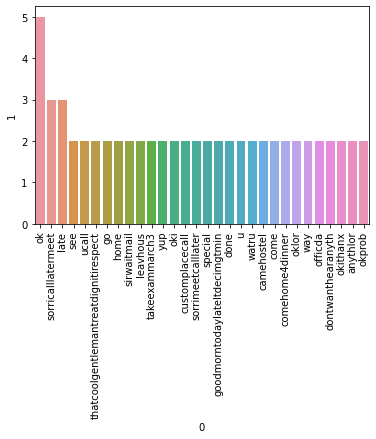

In [64]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
           pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [65]:
#Text Vectorization using Bag of words
df.head()

,Category,Message,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gojurongpointcraziavailbugingreatworldlaebuffe...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokewifuoni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentri2wklicompwinfacupfinaltkt21stmaytextf...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsayearlihorucalreadisay
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahthinkgoeusflivearoundthough


In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [67]:
cv=CountVectorizer()

In [68]:
tfidf=TfidfVectorizer(max_features=3000)

In [69]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape

(5157, 3000)

In [71]:
y=df['Category'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smote=SMOTE()

In [75]:
X_sm,y_sm=smote.fit_resample(X,y)


In [76]:
sc=StandardScaler()


In [77]:
X_sm=sc.fit_transform(X_sm)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

# RandomForestClassifier

In [79]:
rfc=RandomForestClassifier()


In [80]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
y_pred=rfc.predict(X_train)


In [82]:
accuracy_score(y_train,y_pred)

0.8537024221453288

In [83]:
y_pred=rfc.predict(X_test)


In [84]:
accuracy_score(y_test,y_pred)

0.8345323741007195

In [85]:
KF=KFold(5)


In [86]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [87]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.7099447513812155
1 0.6906077348066298
2 0.7008310249307479
3 0.7146814404432132
4 0.7285318559556787


In [88]:
scores.mean()

0.708919361503497

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       895
           1       1.00      0.67      0.80       912

    accuracy                           0.83      1807
   macro avg       0.87      0.84      0.83      1807
weighted avg       0.88      0.83      0.83      1807



In [90]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

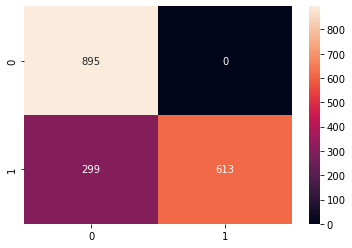

In [91]:
sns.heatmap(data=cm,annot=True,fmt='d')

# LogisticRegression

In [92]:
lr=LogisticRegression()


In [93]:
lr.fit(X_train,y_train)

LogisticRegression()

In [94]:
y_pred=lr.predict(X_train)


In [95]:
accuracy_score(y_train,y_pred)

0.850795847750865

In [96]:
y_pred=lr.predict(X_test)


In [97]:
accuracy_score(y_test,y_pred)

0.8605423353624793

In [98]:
KF=KFold(5)


In [99]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [100]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.7403314917127072
1 0.7403314917127072
2 0.778393351800554
3 0.7617728531855956
4 0.7645429362880887


In [101]:
scores.mean()

0.7570744249399306

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       895
           1       1.00      0.72      0.84       912

    accuracy                           0.86      1807
   macro avg       0.89      0.86      0.86      1807
weighted avg       0.89      0.86      0.86      1807



In [103]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

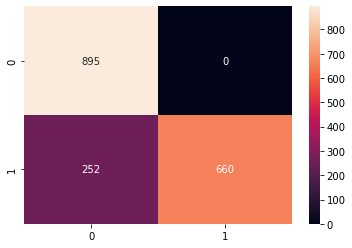

In [104]:
sns.heatmap(data=cm,annot=True,fmt='d')

# KNeighborsClassifier

In [105]:
knc=KNeighborsClassifier()


In [106]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [107]:
y_pred=knc.predict(X_train)


In [108]:
accuracy_score(y_train,y_pred)

0.5856055363321799

In [109]:
y_pred=knc.predict(X_test)


In [110]:
accuracy_score(y_test,y_pred)

0.49861649142224684

In [111]:
KF=KFold(5)


In [112]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [113]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.4143646408839779
1 0.4558011049723757
2 0.5650969529085873
3 0.4903047091412742
4 0.5844875346260388


In [114]:
scores.mean()

0.5020109885064508

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.00      0.00       895
           1       0.50      0.99      0.67       912

    accuracy                           0.50      1807
   macro avg       0.29      0.49      0.33      1807
weighted avg       0.29      0.50      0.34      1807



In [116]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

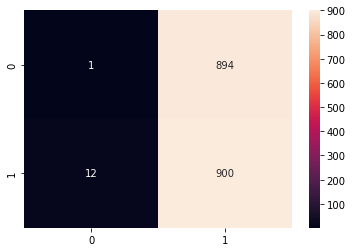

In [117]:
sns.heatmap(data=cm,annot=True,fmt='d')

# XGBClassifier

In [118]:
xgb_i=xgb.XGBClassifier()

In [119]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
y_pred=xgb_i.predict(X_train)


In [121]:
accuracy_score(y_train,y_pred)

0.7998615916955018

In [122]:
y_pred=xgb_i.predict(X_test)


In [123]:
accuracy_score(y_test,y_pred)

0.7526286662977311

In [124]:
KF=KFold(5)


In [125]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [126]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.4861878453038674
1 0.49171270718232046
2 0.4930747922437673
3 0.4930747922437673
4 0.5069252077562327


In [127]:
scores.mean()

0.49419506894599097

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       895
           1       1.00      0.51      0.68       912

    accuracy                           0.75      1807
   macro avg       0.83      0.75      0.74      1807
weighted avg       0.84      0.75      0.74      1807



In [129]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

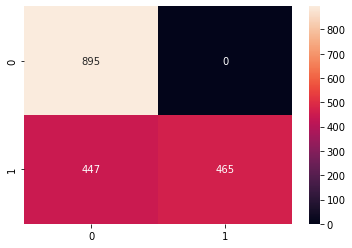

In [130]:
sns.heatmap(data=cm,annot=True,fmt='d')